---
## MNIST Dataset
---
This section gives an overview of the MNIST dataset. The MNIST dataset consists of images of handwritten digits. Each image has a size of 28x28 pixels. Each pixel has a binary value of 0 or 1.

![MNIST Digits](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)[[1]](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)
Tensorflow and Keras provide an interface to download the data & create a batch of images for training.

[MNIST Dataset](Link: http://yann.lecun.com/exdb/mnist/)

In [1]:
# Necessary imports
import time
from IPython import display

# Numpy.
# Matplotlib for plotting images.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, figure
from PIL import Image, ImageOps
import tensorflow as tf

%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

# Read the mnist dataset.
mnist = input_data.read_data_sets("data/", one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [2]:
# NOTE: MNIST is of type: tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet
# Tensorflow porvides an interface to build dataset and create batches.
print(type(mnist[0]), dir(mnist[0]))
print(type(mnist[1]), dir(mnist[1]))

(<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>, ['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_epochs_completed', '_images', '_index_in_epoch', '_labels', '_num_examples', 'epochs_completed', 'images', 'labels', 'next_batch', 'num_examples'])
(<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>, ['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_epochs_completed', '_images', '_index_in_epoch', '_labels', '_num_examples', 'epochs_completed', 'images', 'labels', 'next_batch', 'num_examples'])


In [3]:
# Inspect the dataset.
# Splits: Training, Validation, Testing (90/10).
image_h = 28
image_w = 28
print("Image Size: {}".format(image_h * image_w))
print("---"*11)

# Dataset size.
print("Training data Size: {}".format(mnist[0].num_examples))
print("Training Image Size: {}".format(mnist[0].images.shape))
print("---"*11)
print("Validation Size: {}".format(mnist[1].num_examples))
print("Validation Size: {}".format(mnist[1].images.shape))
print("---"*11)
print("Test Size: {}".format(mnist[2].num_examples))
print("Test Size: {}".format(mnist[2].images.shape))
print("---"*11)

Image Size: 784
---------------------------------
Training data Size: 55000
Training Image Size: (55000, 784)
---------------------------------
Validation Size: 5000
Validation Size: (5000, 784)
---------------------------------
Test Size: 10000
Test Size: (10000, 784)
---------------------------------


From the image size above it is visible that the image of size `28x28` has been reshaped into a single vector of size `1x784`.

Lets __inspect__ some of the images.

Label 9: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Label 1: [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
Label 7: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


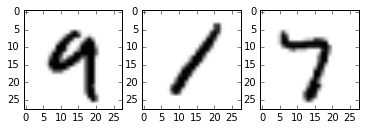

In [4]:
# Figure.
fig = figure()

# An example of an image.
idx = 350 # Random
img_1 = np.reshape(mnist[0].images[idx], (28, 28))
fig.add_subplot(1, 3, 1)
imshow(img_1, cmap="Greys")

img_2 = np.reshape(mnist[0].images[idx+1], (28, 28))
fig.add_subplot(1, 3, 2)
imshow(img_2, cmap="Greys")

img_3 = np.reshape(mnist[0].images[idx+2], (28, 28))
fig.add_subplot(1, 3, 3)
imshow(img_3, cmap="Greys")
print("Label 9: {}".format(mnist[0].labels[idx]))
print("Label 1: {}".format(mnist[0].labels[idx+1]))
print("Label 7: {}".format(mnist[0].labels[idx+2]))

In [5]:
# Test a batch.
batch_size = 25
batch_X, batch_Y = mnist.train.next_batch(batch_size)
print(batch_X.shape, batch_Y.shape)

((25, 784), (25, 10))


---
__Creating Your Own One Hot-encoded Format__

The labels are in one-hot encoded form. To create one ot-encoded labels for your own dataset, the scikit-learn one hot encoder can be used.

In [6]:
# Import encoder.
from sklearn.preprocessing import OneHotEncoder

In [7]:
enc = OneHotEncoder()
enc.fit([[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]])

OneHotEncoder(categorical_features='all', dtype=<type 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [8]:
print("Number of Encoded Values: {}".format(enc.n_values_))
print("Label 9: {}".format(enc.transform([[9]]).toarray()))
print("Label 1: {}".format(enc.transform([[1]]).toarray()))
print("Label 7: {}".format(enc.transform([[7]]).toarray()))

Number of Encoded Values: [10]
Label 9: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
Label 1: [[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]
Label 7: [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
